In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy.stats import ttest_ind

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
add_df = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/additive_test/british/train_cohort_pred.csv", dtype={"sample_names": str, "bmi": float, "bmi_pred": float})
combo_info_df = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/british/train_cohort.csv")

In [3]:
def get_exp_obs(samples, add_df):
    add_df = add_df.loc[add_df.sample_names.isin(samples)]
    return pd.Series({"bmi_pred": add_df.bmi_pred.mean(), "bmi": add_df.bmi.mean()})


combo_add_info = combo_info_df.combo_samples.str.split("|").apply(get_exp_obs, args=(add_df, ))

In [4]:
combo_info_df = pd.concat((combo_info_df, combo_add_info), axis=1)

/tmp/ipykernel_10810/853751207.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
/tmp/ipykernel_10810/853751207.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


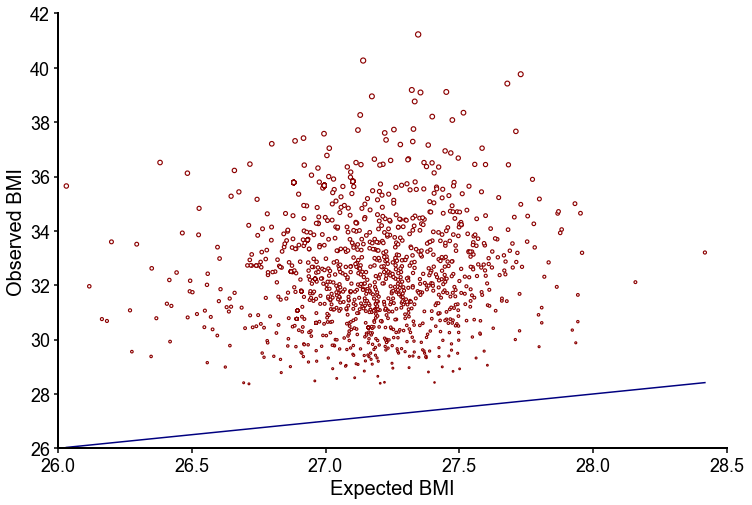

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

plot_df = combo_info_df

plot_df["sizes"] = (plot_df.bmi - plot_df.bmi_pred).abs()

sns_ax = sns.lineplot(data=plot_df, x="bmi_pred", y="bmi_pred", color="navy", ax=ax)


sns_ax2 = sns.scatterplot(data=plot_df, x="bmi_pred", y="bmi", color="white", ax=ax, s=(plot_df.sizes)*2, ec="darkred", linewidth=1.15)

ax.set_xlim((26, 28.5))
ax.set_ylim((26, 42))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
ax.set_xlabel("Expected BMI", fontsize=20)
ax.set_ylabel("Observed BMI", fontsize=20)
# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);



In [6]:
ttest_ind(add_df.bmi, add_df.bmi_pred, alternative="greater", equal_var=False)

TtestResult(statistic=78.93202208040587, pvalue=0.0, df=10322.140574743995)

In [7]:
combo_info_df = pd.concat((combo_info_df, combo_info_df.uniq_items.str.split("|", expand=True).rename(columns={0: "Gene1", 1: "Gene2", 2: "Gene3"})), axis=1)

In [8]:
combo_info_df

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
0,Input_BMPR1B|Input_SHC2,1096941|1121194|1997309|2079898|2120943|217223...,25.2177|31.8169|29.7973|30.6077|36.4844|40.526...,-0.6341|0.3844|0.7147|-1.0385|0.3847|-0.6544|-...,29.899347,-0.102332,27.357535,29.899348,2.541813,Input_BMPR1B,Input_SHC2,None
1,Input_BCHE|Input_TRPV4,1133669|1470103|2289357|2326174|2424337|249952...,36.1141|26.5347|32.6443|35.876|35.695|26.467|2...,2.0238|0.1007|0.146|0.6141|0.4298|-1.1271|1.85...,30.465390,-0.208248,27.200138,30.465388,3.265250,Input_BCHE,Input_TRPV4,None
2,Input_ABCA13|Input_DDX60L,1182163|1253768|1355755|1397710|1786412|216534...,22.0626|32.2567|23.4142|26.1228|26.0272|32.258...,0.1696|0.4431|-0.4947|1.0083|-0.4018|-0.6605|-...,29.369196,-0.253836,27.162253,29.369197,2.206944,Input_ABCA13,Input_DDX60L,None
3,Input_MYH14|Input_NR1D1,1010013|1062480|1156553|1363786|1544603|156336...,34.4037|31.0827|40.6865|30.2985|32.9395|35.366...,-0.0607|-0.0152|3.5442|-1.4102|1.1856|-0.3859|...,30.576409,0.077766,27.490349,30.576412,3.086063,Input_MYH14,Input_NR1D1,None
4,Input_ADAM19|Input_MMUT,1793868|1803901|2119938|2191681|2228888|235212...,28.4275|30.8969|34.6148|31.6612|26.2346|27.501...,-0.8153|-0.7332|1.0501|0.5091|0.7553|0.1197|-2...,30.200655,-0.005115,27.577762,30.200657,2.622895,Input_ADAM19,Input_MMUT,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1829,Input_CPT1B|Input_DRG1|Input_SFI1,1220595|2797301|3109180|3593971|4158131|432321...,33.9227|37.0634|26.1545|28.0957|29.1036|33.156...,0.5131|0.6176|-0.9988|-0.7839|-2.2651|0.1041|0...,32.250343,-0.361114,27.198811,32.250343,5.051532,Input_CPT1B,Input_DRG1,Input_SFI1
1830,Input_ACAP3|Input_SLC7A8|Input_TAS1R3,1332204|1545778|3196670|4231707|5749390,35.2955|32.8785|37.4052|34.4526|33.4373,-0.1386|0.1332|-0.8578|0.8237|-0.8838,34.693820,-0.184660,27.392846,34.693820,7.300974,Input_ACAP3,Input_SLC7A8,Input_TAS1R3
1831,Input_F5|Input_NBEAL2|Input_SPINK8,2828581|4227055|4691233|4840853|5142560|579302...,44.8514|31.9673|32.6294|31.3889|26.1977|31.018...,1.8361|-0.7897|-1.4216|-0.0547|0.1682|-0.3847|...,32.200229,-0.172057,26.941635,32.200229,5.258593,Input_F5,Input_NBEAL2,Input_SPINK8
1832,Input_GHDC|Input_KRTAP2-3|Input_TTN,1730047|3401377|4128798|4978416|5099625|523873...,32.3753|26.922|28.1147|34.4894|35.7536|36.1595...,-1.1456|-1.1108|0.3841|0.289|0.1913|0.5066|0.4...,30.890500,-0.261078,26.718401,30.890494,4.172093,Input_GHDC,Input_KRTAP2-3,Input_TTN


In [9]:
combo_info_df_mini = combo_info_df.sort_values("sizes", ascending=False).head()

In [10]:
combo_info_df_mini

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
407,Input_CYP4X1|Input_MADD,1352636|2711845|2919717|3057210|3901565,44.4274|32.1417|43.2854|47.3861|38.892,1.5645|-1.0699|1.3474|1.4825|-0.6877,41.226520,0.527360,27.345783,41.226520,13.880737,Input_CYP4X1,Input_MADD,None
724,Input_CAPN3|Input_COL5A1|Input_NAV2,1611646|2248003|2358834|4333681|5771078,47.442|35.994|33.9934|44.1023|39.7988,0.7953|0.5075|0.7309|-0.2195|-0.4762,40.266100,0.267600,27.140436,40.266100,13.125664,Input_CAPN3,Input_COL5A1,Input_NAV2
556,Input_DHX40|Input_KIF13A,1927273|2614259|2776520|4790829|5400369,33.2408|33.5135|37.0636|43.5528|51.4464,0.2654|0.2536|0.2756|1.2577|-1.3381,39.763420,0.142840,27.728695,39.763420,12.034725,Input_DHX40,Input_KIF13A,None
658,Input_AGL|Input_ZNG1A,1150621|2169005|4128975|4617423|4625709|5736757,41.6244|31.5079|29.3724|45.9755|41.5958|45.0242,0.4372|-1.1315|-1.5094|-0.3921|1.4593|-0.3262,39.183367,-0.243783,27.322051,39.183367,11.861315,Input_AGL,Input_ZNG1A,None
766,Input_LRP1B|Input_MYO15A|Input_TENM2,2227744|2669838|4540934|5594465|5733061,34.5583|34.8437|51.9459|33.6458|39.7503,-0.3361|1.7781|0.1492|-1.1473|0.6543,38.948800,0.219640,27.173057,38.948800,11.775743,Input_LRP1B,Input_MYO15A,Input_TENM2


In [11]:
all_genes = "|".join(combo_info_df.uniq_items).split("|")

In [12]:
gene_count_dict = Counter(all_genes)

In [13]:
gene_count_dict = Counter(all_genes)

In [14]:
topn = 15

In [15]:
def find_best_factor_for_heatmap(num):
    factors = []
    for i in range(1, int(num**0.5)+1):
        if num%i==0:
            possible_factors = tuple(sorted([i, num//i]))
            if possible_factors[1]/possible_factors[0]<5:
                factors.append(possible_factors)
    return sorted(factors, key=lambda x: abs(2-(x[1]/x[0])))[0]


In [16]:
values_in_arr = topn**2

In [17]:
heatmap_layout = find_best_factor_for_heatmap(values_in_arr)

In [18]:
heatmap_layout

(9, 25)

In [19]:
combo_info_df_mini = combo_info_df.sort_values("sizes", ascending=False).head(topn)

In [20]:
gene_count_dict = Counter("|".join(combo_info_df_mini.uniq_items).split("|"))

In [21]:
xset = set()
yset = set()
zset = set()


myarr = np.zeros(heatmap_layout)
sorted_genes = [g[0] for g in gene_count_dict.most_common()]

for df_values in combo_info_df_mini.itertuples():
    genes = df_values.uniq_items.split("|")
    print(genes)
    break

['Input_CYP4X1', 'Input_MADD']


In [22]:
gene_count_dict["Input_MADD"]

1

In [23]:
myarr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [24]:
sorted(gene_count_dict.values())[::-1]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [25]:
combo_info_df_mini

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
407,Input_CYP4X1|Input_MADD,1352636|2711845|2919717|3057210|3901565,44.4274|32.1417|43.2854|47.3861|38.892,1.5645|-1.0699|1.3474|1.4825|-0.6877,41.226520,0.527360,27.345783,41.226520,13.880737,Input_CYP4X1,Input_MADD,None
724,Input_CAPN3|Input_COL5A1|Input_NAV2,1611646|2248003|2358834|4333681|5771078,47.442|35.994|33.9934|44.1023|39.7988,0.7953|0.5075|0.7309|-0.2195|-0.4762,40.266100,0.267600,27.140436,40.266100,13.125664,Input_CAPN3,Input_COL5A1,Input_NAV2
556,Input_DHX40|Input_KIF13A,1927273|2614259|2776520|4790829|5400369,33.2408|33.5135|37.0636|43.5528|51.4464,0.2654|0.2536|0.2756|1.2577|-1.3381,39.763420,0.142840,27.728695,39.763420,12.034725,Input_DHX40,Input_KIF13A,None
658,Input_AGL|Input_ZNG1A,1150621|2169005|4128975|4617423|4625709|5736757,41.6244|31.5079|29.3724|45.9755|41.5958|45.0242,0.4372|-1.1315|-1.5094|-0.3921|1.4593|-0.3262,39.183367,-0.243783,27.322051,39.183367,11.861315,Input_AGL,Input_ZNG1A,None
766,Input_LRP1B|Input_MYO15A|Input_TENM2,2227744|2669838|4540934|5594465|5733061,34.5583|34.8437|51.9459|33.6458|39.7503,-0.3361|1.7781|0.1492|-1.1473|0.6543,38.948800,0.219640,27.173057,38.948800,11.775743,Input_LRP1B,Input_MYO15A,Input_TENM2
1827,Input_SLTM|Input_UGT2A1|Input_UGT2A2,1423410|2371234|5263412|5395078|5575157,44.7485|38.1368|32.807|43.8672|37.5371,1.0786|-0.927|-0.8445|0.6968|0.2338,39.419320,0.047540,27.678681,39.419320,11.740639,Input_SLTM,Input_UGT2A1,Input_UGT2A2
500,Input_CDHR5|Input_LGALS3,1067405|1147403|2063573|3573636|3814661,30.4297|49.1908|42.2968|37.5545|35.9852,0.0213|1.547|-0.6463|1.1504|-0.9388,39.091400,0.226720,27.354521,39.091410,11.736889,Input_CDHR5,Input_LGALS3,None
588,Input_FAM83H|Input_PCDHGA3,1962497|2460496|3644815|3670411|5682786,48.4246|43.8883|40.7407|30.8129|31.6866,0.0106|-1.0231|-1.7079|-0.8444|1.0591,39.110620,-0.501140,27.450827,39.110620,11.659793,Input_FAM83H,Input_PCDHGA3,None
642,Input_COL23A1|Input_SPSB4,1086939|1384098|1408257|1452956|4914345|550853...,45.6209|38.7966|34.9907|44.7059|58.3423|23.951...,2.5981|1.084|1.2164|-0.5|1.5772|-1.1333|-1.2541,38.761071,0.512614,27.332878,38.761079,11.428200,Input_COL23A1,Input_SPSB4,None
1150,Input_ABCA7|Input_LRP5|Input_TSC2,1155754|1370315|2343456|3537203|4181518,34.2129|35.8849|40.1953|37.461|43.5599,-0.7608|1.2583|-0.5694|-0.1048|1.625,38.262800,0.289660,27.129444,38.262800,11.133356,Input_ABCA7,Input_LRP5,Input_TSC2


In [26]:
combo_info_df.sort_values("sizes", ascending=False)

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
407,Input_CYP4X1|Input_MADD,1352636|2711845|2919717|3057210|3901565,44.4274|32.1417|43.2854|47.3861|38.892,1.5645|-1.0699|1.3474|1.4825|-0.6877,41.226520,0.527360,27.345783,41.226520,13.880737,Input_CYP4X1,Input_MADD,None
724,Input_CAPN3|Input_COL5A1|Input_NAV2,1611646|2248003|2358834|4333681|5771078,47.442|35.994|33.9934|44.1023|39.7988,0.7953|0.5075|0.7309|-0.2195|-0.4762,40.266100,0.267600,27.140436,40.266100,13.125664,Input_CAPN3,Input_COL5A1,Input_NAV2
556,Input_DHX40|Input_KIF13A,1927273|2614259|2776520|4790829|5400369,33.2408|33.5135|37.0636|43.5528|51.4464,0.2654|0.2536|0.2756|1.2577|-1.3381,39.763420,0.142840,27.728695,39.763420,12.034725,Input_DHX40,Input_KIF13A,None
658,Input_AGL|Input_ZNG1A,1150621|2169005|4128975|4617423|4625709|5736757,41.6244|31.5079|29.3724|45.9755|41.5958|45.0242,0.4372|-1.1315|-1.5094|-0.3921|1.4593|-0.3262,39.183367,-0.243783,27.322051,39.183367,11.861315,Input_AGL,Input_ZNG1A,None
766,Input_LRP1B|Input_MYO15A|Input_TENM2,2227744|2669838|4540934|5594465|5733061,34.5583|34.8437|51.9459|33.6458|39.7503,-0.3361|1.7781|0.1492|-1.1473|0.6543,38.948800,0.219640,27.173057,38.948800,11.775743,Input_LRP1B,Input_MYO15A,Input_TENM2
...,...,...,...,...,...,...,...,...,...,...,...,...
109,Input_CACNA1B|Input_RFT1,1604124|1610655|1953609|1975516|2012972|222366...,34.0935|26.7378|25.4937|31.8047|34.0234|29.179...,-0.5564|-0.6436|-0.1983|-1.0605|-0.4577|0.3571...,28.923059,-0.280505,27.500621,28.923053,1.422432,Input_CACNA1B,Input_RFT1,None
168,Input_MCAT|Input_SACS,1007953|1129594|1146388|1197329|1235509|142226...,30.6831|20.5019|25.8761|24.2468|27.8074|26.272...,0.1617|-1.6637|-0.6005|-0.9807|0.2294|1.5856|-...,28.831590,-0.282598,27.476036,28.831589,1.355553,Input_MCAT,Input_SACS,None
581,Input_ANO2|Input_CD9,1028069|1051676|1496170|1520504|1580809|162670...,26.5916|23.4755|32.7278|23.767|33.114|33.1111|...,-1.6513|-1.2004|1.2882|-0.6366|-0.3166|0.4135|...,28.429382,-0.773436,27.219990,28.429373,1.209382,Input_ANO2,Input_CD9,None
116,Input_MYL3|Input_SCAP,1729183|1761514|1765426|1855728|2356388|236748...,24.0278|31.9922|28.3563|22.0767|27.2498|30.899...,-1.1979|-0.6409|-0.8045|-2.7023|-0.3588|-1.479...,28.392381,-0.812843,27.204165,28.392385,1.188219,Input_MYL3,Input_SCAP,None
